# IKpy Quick-start #

# Requirements

First, you need to install IKPy (see [installations instructions](https://github.com/Phylliade/ikpy)).
You also need a URDF file.  
By default, we use the files provided in the [resources](https://github.com/Phylliade/ikpy/tree/master/resources) folder of the IKPy repo.

Import the IKPy module : 

In [1]:
import sys
sys.path.append("../src/")
import ikpy
import numpy as np
from ikpy import plot_utils

The basic element of IKPy is the kinematic `Chain`.
To create a chain from an URDF file : 

In [2]:
my_chain = ikpy.chain.Chain.from_urdf_file("../resources/poppy_ergo.URDF")

Note : as mentioned before, here we use a file in the resource folder.

# Inverse kinematics

In Inverse Kinematics, you want your kinematic chain to reach a 3D position in space.

To have a more general representation of position, IKPy works with homogeneous coordinates. It is a 4x4 matrix storing both position and orientation.
Prepare your desired position as a 4x4 matrix. Here we only consider position, not orientation of the chain.

In [3]:
target_vector = [ 0.0, 0.1, 0.2]
target_frame = np.ones((4,4))
target_frame[:3, 3] = target_vector

In [4]:
print(target_frame)
six_axis = my_chain.inverse_kinematics(target_frame)
print("The angles of each joints are :\n", six_axis)
print(my_chain)

[[1.  1.  1.  0. ]
 [1.  1.  1.  0.1]
 [1.  1.  1.  0.2]
 [1.  1.  1.  1. ]]
The angles of each joints are :
 [ 0.         -0.45643019  0.49304589 -0.08777927  0.7356644  -0.45032816
  0.        ]
Kinematic chain name=chain links=[Link name=Base link bounds=(None, None), Link name=m1 bounds=(None, None), Link name=m2 bounds=(None, None), Link name=m3 bounds=(None, None), Link name=m4 bounds=(None, None), Link name=m5 bounds=(None, None), Link name=m6 bounds=(None, None)] active_links=[ True  True  True  True  True  True  True]


You can check that the Inverse Kinematics is correct by comparing with the original position vector : 

In [5]:
real_frame = my_chain.forward_kinematics(six_axis)
print("Computed position vector :\n %s,\n original position vector :\n %s" % (real_frame, target_frame))
six_axis_ag = my_chain.inverse_kinematics(real_frame)
print(six_axis_ag)

Computed position vector :
 [[-8.80350801e-01  4.38363739e-01  1.81162079e-01 -1.59918717e-10]
 [ 3.93673172e-01  8.88319237e-01 -2.36453733e-01  9.99999983e-02]
 [-2.64582502e-01 -1.36843582e-01 -9.54604595e-01  2.00000001e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]],
 original position vector :
 [[1.  1.  1.  0. ]
 [1.  1.  1.  0.1]
 [1.  1.  1.  0.2]
 [1.  1.  1.  1. ]]
[ 0.         -0.45643015  0.49304592 -0.08777927  0.7356644  -0.45032817
  0.        ]


# Plotting
And finally plot the result : 

(If the code below doesn't work, comment the `%maplotlib notebook` line, and uncomment the `%matplotlib inline` line)

<IPython.core.display.Javascript object>


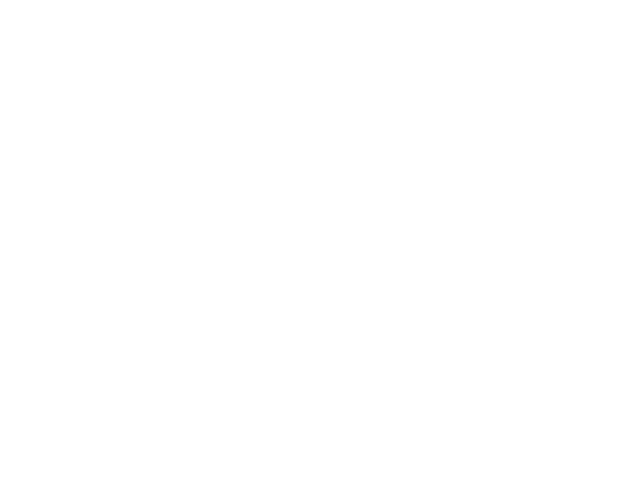

(-0.1, 0.1)

In [6]:
# If there is a matplotlib error, uncomment the next line, and comment the line below it.
# %matplotlib inline
%matplotlib notebook
import matplotlib.pyplot as plt
ax = plot_utils.init_3d_figure()
my_chain.plot(six_axis, ax, target=target_vector)
plt.xlim(-0.1, 0.1)
plt.ylim(-0.1, 0.1)

You're done! Go to the [tutorials](https://github.com/Phylliade/ikpy/wiki) to understand the general concepts of the library.

<IPython.core.display.Javascript object>


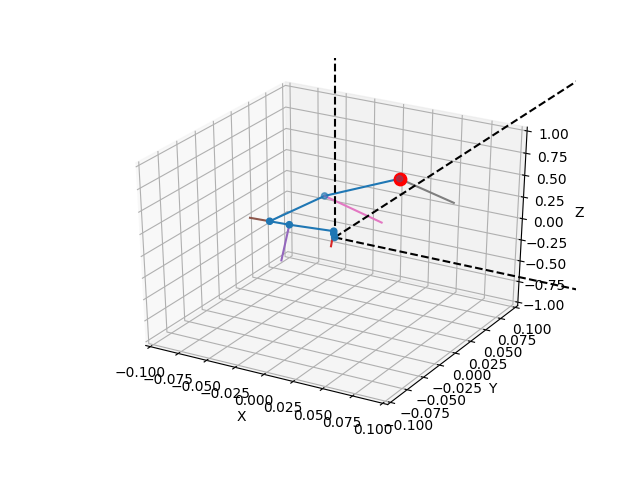

(-0.1, 0.1)

In [7]:
# If there is a matplotlib error, uncomment the next line, and comment the line below it.
# %matplotlib inline
%matplotlib notebook
import matplotlib.pyplot as plt
ax = plot_utils.init_3d_figure()
my_chain.plot(six_axis_ag, ax, target=target_vector)
plt.xlim(-0.1, 0.1)
plt.ylim(-0.1, 0.1)